## Data Load

In [77]:
import pandas as pd
import numpy as np

In [78]:
data = pd.read_csv("../data/DiamondsPrices.csv")
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Data Imputing

In [79]:
data[data["carat"].isnull()]

,carat,cut,color,clarity,depth,table,price,x,y,z
6,NaN,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47


In [80]:
data.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [81]:
columns_has_missing_values = []
for cn in data.columns:
    missing_column = data[data[cn].isnull()]
    if len(missing_column)>0:
        columns_has_missing_values.append(cn)
        print("Missing Column Name ", cn)
        print(missing_column)
        print("-"*100)

Missing Column Name  carat
   carat        cut color clarity  depth  table  price     x     y     z
6    NaN  Very Good     I    VVS1   62.3   57.0    336  3.95  3.98  2.47
----------------------------------------------------------------------------------------------------
Missing Column Name  x
    carat    cut color clarity  depth  table  price   x     y     z
65   0.28  Ideal     G    VVS2   61.4   56.0    553 NaN  4.22  2.58
----------------------------------------------------------------------------------------------------
Missing Column Name  z
    carat      cut color clarity  depth  table  price     x     y   z
26   0.24  Premium     I     VS1   62.5   57.0    355  3.97  3.94 NaN
----------------------------------------------------------------------------------------------------


In [82]:
# for cn in columns_has_missing_values:

#     sum = 0
#     for index, row in data.iterrows():
#         if not np.isnan(row[cn]):
#             sum += row[cn]
#     mean_value = sum / len(data)
#     index = data[data[cn].isnull()].index
#     data.loc[index,cn] = mean_value



In [83]:
# SKLEARN VERSION
from sklearn.impute import SimpleImputer
si = SimpleImputer(strategy="mean", missing_values=np.nan)

for cn in data.columns:
    if len(data[data[cn].isnull()]):
        data[cn] = si.fit_transform(data[cn].values.reshape(-1,1))

In [84]:
data["carat"][6]

np.float64(0.7979500917703333)

## Data Encoding

In [85]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [86]:
columns_to_encode = ["cut","color","clarity"]

In [87]:
data = pd.get_dummies(data, dtype=int)
data.head()

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,1,0,...,0,1,0,0,0,1,0,0,0,0


In [88]:
data.columns

Index(['carat', 'depth', 'table', 'price', 'x', 'y', 'z', 'cut_Fair',
       'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_D',
       'color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J',
       'clarity_I1', 'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1',
       'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2'],
      dtype='object')

In [89]:
len(data.columns)

27

## Normalization

In [90]:
data.describe()

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,...,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797950,61.749405,57.457184,3932.799722,5.731186,5.734526,3.538754,0.029848,0.090953,0.399537,...,0.100519,0.052058,0.013737,0.033185,0.242214,0.170449,0.151483,0.227253,0.067760,0.093919
std,0.474005,1.432621,2.234491,3989.439738,1.121741,1.142135,0.705684,0.170169,0.287545,0.489808,...,0.300694,0.222146,0.116400,0.179121,0.428427,0.376030,0.358522,0.419061,0.251337,0.291719
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# columns_to_normalize = ["carat","depth","table","x","y","z"]

# for cn in columns_to_normalize:
#     x_min = data[cn].min()
#     x_max = data[cn].max()

#     for index, row in data.iterrows():
#         x = row[cn]
#         scale_x = (x - x_min)/(x_max-x_min)
#         data.loc[index,cn] = scale_x

# SORU/ÖDEV : Bu kod neden 17 saniyede çalıştı, minmax scaler çok kısa sürede gerçekleşti???

In [92]:
data.head()

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,1,0,...,0,1,0,0,0,1,0,0,0,0


In [93]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:
mms = MinMaxScaler()
columns_to_normalize = ["carat","depth","table","x","y","z"]
for cn in columns_to_normalize:

    data[cn] = mms.fit_transform(data[cn].values.reshape(-1,1))

In [ ]:
data_train = 0
data_test = 0

mms.fit(data_train)
data_train = mms.transform(data_train)
data_test = mms.transform(data_test)

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.006237,0.513889,0.230769,326,0.367784,0.067572,0.076415,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.002079,0.466667,0.346154,326,0.362197,0.065195,0.072642,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.006237,0.386111,0.423077,327,0.377095,0.069100,0.072642,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0.018711,0.538889,0.288462,334,0.391061,0.071817,0.082704,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.022869,0.563889,0.288462,335,0.404097,0.073854,0.086478,0,1,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.108108,0.494444,0.269231,2757,0.535382,0.097793,0.110063,0,0,1,...,0,0,0,0,1,0,0,0,0,0
53936,0.108108,0.558333,0.230769,2757,0.529795,0.097623,0.113522,0,1,0,...,0,0,0,0,1,0,0,0,0,0
53937,0.103950,0.550000,0.326923,2757,0.527002,0.096435,0.111950,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53938,0.137214,0.500000,0.288462,2757,0.572626,0.103905,0.117610,0,0,0,...,0,0,0,0,0,1,0,0,0,0


## Feature Selection

In [96]:
data.columns

Index(['carat', 'depth', 'table', 'price', 'x', 'y', 'z', 'cut_Fair',
       'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_D',
       'color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J',
       'clarity_I1', 'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1',
       'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2'],
      dtype='object')

In [97]:
from sklearn.feature_selection import mutual_info_regression

In [ ]:
Y = data.pop("price")
X = data


In [104]:
importances = mutual_info_regression(X,Y)

In [109]:
iColumns = pd.Series(importances, X.columns)
iColumns = iColumns.sort_values(ascending=False)
iColumns

carat            1.960148
y                1.491893
x                1.482016
z                1.432477
clarity_SI1      0.087301
clarity_VS2      0.086652
clarity_SI2      0.081489
color_E          0.076900
color_D          0.069401
color_G          0.063483
table            0.056631
color_F          0.056077
clarity_VVS2     0.053958
cut_Ideal        0.051334
clarity_VVS1     0.050978
clarity_VS1      0.050366
color_H          0.044576
cut_Premium      0.040977
clarity_IF       0.038516
depth            0.035832
color_I          0.033425
cut_Very Good    0.027927
color_J          0.020093
cut_Good         0.018435
cut_Fair         0.012839
clarity_I1       0.004556
dtype: float64

<Axes: >

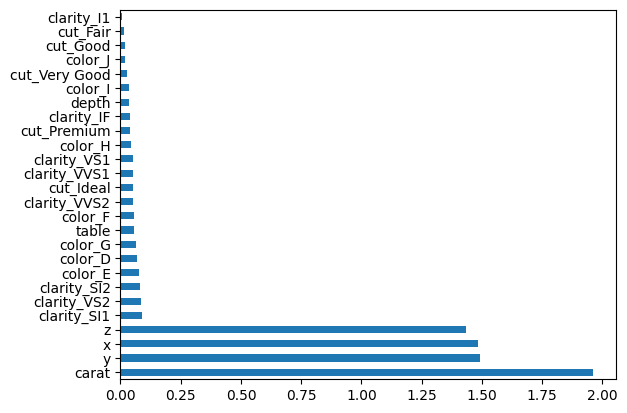

In [111]:
iColumns.plot(kind="barh")

In [114]:
iColumns[:5].index

Index(['carat', 'y', 'x', 'z', 'clarity_SI1'], dtype='object')

In [117]:
X = data[iColumns[:5].index]

In [119]:
X

,carat,y,x,z,clarity_SI1
0,0.006237,0.067572,0.367784,0.076415,0
1,0.002079,0.065195,0.362197,0.072642,1
2,0.006237,0.069100,0.377095,0.072642,0
3,0.018711,0.071817,0.391061,0.082704,0
4,0.022869,0.073854,0.404097,0.086478,0
...,...,...,...,...,...
53935,0.108108,0.097793,0.535382,0.110063,1
53936,0.108108,0.097623,0.529795,0.113522,1
53937,0.103950,0.096435,0.527002,0.111950,1
53938,0.137214,0.103905,0.572626,0.117610,0


## Feature Engineering

In [121]:
X["v"] = X["x"] * X["y"] * X["z"]
X.head()

/var/folders/s_/kmpqzt4x6v1gnxgjch8x_81h0000gn/T/ipykernel_31277/3660430022.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["v"] = X["x"] * X["y"] * X["z"]


,carat,y,x,z,clarity_SI1,v
0,0.006237,0.067572,0.367784,0.076415,0,0.001899
1,0.002079,0.065195,0.362197,0.072642,1,0.001715
2,0.006237,0.069100,0.377095,0.072642,0,0.001893
3,0.018711,0.071817,0.391061,0.082704,0,0.002323
4,0.022869,0.073854,0.404097,0.086478,0,0.002581


In [122]:
X.pop("x")
X.pop("y")
X.pop("z")

0        0.076415
1        0.072642
2        0.072642
3        0.082704
4        0.086478
           ...   
53935    0.110063
53936    0.113522
53937    0.111950
53938    0.117610
53939    0.114465
Name: z, Length: 53940, dtype: float64

In [123]:
X

,carat,clarity_SI1,v
0,0.006237,0,0.001899
1,0.002079,1,0.001715
2,0.006237,0,0.001893
3,0.018711,0,0.002323
4,0.022869,0,0.002581
...,...,...,...
53935,0.108108,1,0.005763
53936,0.108108,1,0.005871
53937,0.103950,1,0.005689
53938,0.137214,0,0.006998


## Test with a Regression Model

In [124]:
from sklearn.svm import SVR
# from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.linear_model import LogisticRegression

In [125]:
model = SVR()
model.fit(X,Y)

,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,tol,0.001
,C,1.0
,epsilon,0.1
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


In [126]:
# 0	0.006237	0	0.001899
model.predict([[0.05,1,0.001899]])

/Users/mehmetbilen/Documents/GitHub/machine-learning/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


array([2341.01504203])